<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/Sound_classification_UrbanSound_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sound Classification, Urband Sound

The dataset is called UrbanSound and contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: - The dataset contains 8732 sound excerpts (<=4s) of urban sounds from 10 classes, namely: Air Conditioner Car Horn Children Playing Dog bark Drilling Engine Idling Gun Shot Jackhammer Siren Street Music The attributes of data are as follows: ID – Unique ID of sound excerpt Class – type of sound

Reference: 
- https://towardsdatascience.com/urban-sound-classification-using-neural-networks-9b6fcd8a9150
- https://www.kaggle.com/mychen76/automatic-urban-sound-classification-with-cnn

Dataset:
- https://drive.google.com/drive/folders/0By0bAi7hOBAFUHVXd1JCN3MwTEU
- https://www.kaggle.com/chrisfilo/urbansound8k

In this code, I use towarddatascience.com

In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.preprocessing

**GPU usage**
- Edit -> Notebook setting -> GPU

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


The first step is to install PyDrive. As we are using a Notebook environment, the installation using PIP will always have the exclamation mark (!) in front.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

The second step is to authenticate and create a PyDrive client. See there:

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
drive

As soon as you execute this part of the code, the authenticator will ask you to click on the link that appears in your notebook. 
You must follow this third step, click on the link, authenticate with your Gmail account and copy the generated code. 
Return to your notebook and paste this code into the requested area. Press Enter, and you’re done, you’re authenticated!

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now comes a more tricky part. This is the fourth step. Go to your Google Drive, find your file and perform the same procedure to share that file, generating a shareable link:

In [5]:
UrbanSound8K = pd.read_csv('drive/My Drive/My Colab/dataset/UrbanSound/sample/UrbanSound8K.csv')
print(UrbanSound8K.shape)
UrbanSound8K

(8732, 8)


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


librosa library. It is a good library to use with audio files.

In [10]:
train_csv = pd.read_csv('drive/My Drive/My Colab/dataset/UrbanSound/sample/train.csv')
print(train_csv.shape)
train_csv

(5435, 2)


,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark
...,...,...
5430,8725,engine_idling
5431,8726,dog_bark
5432,8727,engine_idling
5433,8728,engine_idling


In [11]:
import librosa
import librosa.display
import IPython.display as ipd

In [12]:
sample = 'drive/My Drive/My Colab/dataset/UrbanSound/sample/0.wav'

In [13]:
y, sr = librosa.load(sample)
print(y.shape)
print(y)
print(sr)

(88200,)
[-0.01212928 -0.02760112 -0.02535508 ...  0.09790608  0.04330474
 -0.00681015]
22050


y: 2D array

- The first axis: represents the recorded samples of amplitudes (change of air pressure) in the audio.

- The second axis: represents the number of channels in the audio.

sr: sample rate

- which means how many samples are recorded per second.

waveplot

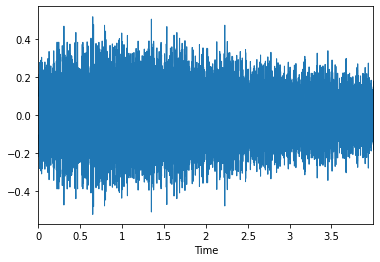

In [14]:
librosa.display.waveplot(y,sr)

audio

In [15]:
ipd.Audio(sample) 

spectrum

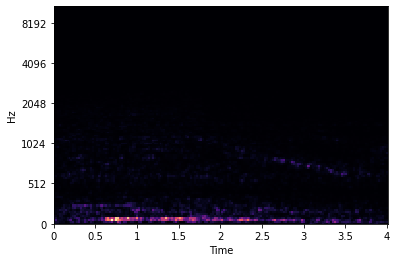

In [16]:
ps = librosa.feature.melspectrogram(y=y, sr=sr)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

Using librosa library, I will be extracting four features from the audio files. 
- Mel-frequency cepstral coefficients (MFCCs)
- tonnetz
- mel-scaled spectrogram 
- chromagram from a waveform.

In [17]:
from tqdm import tqdm
data = ['0', '1', '10', '1001']
tag = ['siren', 'street_music', 'gun_shot', 'air_conditioner']

mfcc=[]
chromagram=[]
mel_scaled_spectrogram=[]
tonnetz=[]
label=[]
#for i in range(len(data)):
for i in tqdm(range(len(data))):
    f = 'drive/My Drive/My Colab/dataset/UrbanSound/sample/'+str(data[i])+'.wav'
    X, sr = librosa.load(f, res_type='kaiser_fast')
    mfcc.append(np.mean(librosa.feature.mfcc(y=X, sr=sr).T,axis=0))
    #l=data.Class[i]
    label.append(tag[i])
    try:
        tonnetz.append(np.mean(librosa.feature.tonnetz(
                       y=librosa.effects.harmonic(X),
                       sr=sr).T,axis=0))
    except:
        print(f)  
    mel_scaled_spectrogram.append(np.mean(librosa.feature.melspectrogram(X, sr=sr).T,axis=0))
    chromagram.append(np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(X)), sr=sr).T,axis=0))

100%|██████████| 4/4 [00:06<00:00,  1.61s/it]


In [25]:
df_mfcc = pd.DataFrame(mfcc)
df_mfcc.to_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/sample/mfcc.csv', index=False)
df_chromagram = pd.DataFrame(chromagram)
df_chromagram.to_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/sample/chromagram.csv', index=False)
df_mel_scaled_spectrogram = pd.DataFrame(mel_scaled_spectrogram)
df_mel_scaled_spectrogram.to_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/sample/mel_scaled_spectrogram.csv', index=False)
df_tonnetz = pd.DataFrame(tonnetz)
df_tonnetz.to_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/sample/tonnetz.csv', index=False)
df_label = pd.DataFrame(label)
df_label.to_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/sample/labels.csv', index=False)


In [28]:
mfcc_csv = pd.read_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/sample/mfcc.csv')
print(mfcc_csv.shape)
mfcc_csv.head()

(4, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-82.123589,139.505920,-42.430866,24.827860,-11.620764,23.497084,-12.194590,25.897139,-9.405277,21.210430,-7.368822,14.254338,-8.678699,7.750238,-10.124115,3.258119,-11.352619,2.800969,-7.046013,3.913313
1,-15.744005,124.119965,-29.428881,39.447193,-23.501913,16.550816,-21.736818,16.533573,-16.971729,4.483583,-17.387690,0.737122,-16.289228,5.112149,-10.559232,2.917874,-10.390848,0.651300,-10.046337,-1.783480
2,-203.975525,83.958138,-66.730278,18.536461,-20.581497,1.906205,-6.121213,15.719910,-6.935401,11.426914,-5.830719,6.477780,-3.897224,11.948621,-9.477356,14.071952,-3.104123,5.203726,-3.465236,-0.456738
3,-56.223137,81.908676,-48.575947,50.730331,-3.198354,24.789114,-3.594649,16.810408,-13.295942,10.908148,-11.488308,10.751176,-8.921140,15.399091,-10.712870,13.753638,-8.134835,10.268895,-7.316179,12.275788


In [29]:
chromagram_csv = pd.read_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/sample/chromagram.csv')
print(chromagram_csv.shape)
chromagram_csv.head()

(4, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.798327,0.840953,0.819065,0.806548,0.825885,0.849393,0.868582,0.825281,0.810259,0.772253,0.769334,0.796989
1,0.575610,0.546653,0.525930,0.508931,0.688916,0.691444,0.489670,0.494668,0.543663,0.810689,0.785146,0.608858
2,0.653244,0.573683,0.481442,0.561014,0.688101,0.571858,0.571268,0.559539,0.598871,0.667794,0.558969,0.703391
3,0.875798,0.875772,0.837855,0.829503,0.783363,0.854598,0.954783,0.907160,0.883355,0.828772,0.768317,0.848417


In [30]:
mel_scaled_spectrogram_csv = pd.read_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/sample/mel_scaled_spectrogram.csv')
print(mel_scaled_spectrogram_csv.shape)
mel_scaled_spectrogram_csv.head()

(4, 128)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,5.877411,20.340004,52.088253,38.230877,10.435853,9.489508,14.070208,13.531417,9.395260,9.965685,5.377651,3.791810,3.714450,2.822271,1.610408,1.565742,0.982282,1.232149,1.769040,2.172304,2.772805,3.525201,4.575321,5.853333,5.626757,4.193027,4.340253,4.359746,4.521832,4.630864,4.123395,4.109125,4.670904,2.934501,2.374004,3.214286,3.681732,2.842596,2.082450,3.194991,...,0.052536,0.056447,0.048744,0.051100,0.032841,0.022725,0.019507,0.016730,0.018125,0.017003,0.017844,0.016244,0.014865,0.015109,0.015664,0.013348,0.013146,0.012771,0.012263,0.010395,0.009985,0.009947,0.009435,0.008442,0.008900,0.007237,0.006975,0.006928,0.005444,0.004113,0.003204,0.002137,0.001383,0.000757,0.000374,0.000128,0.000032,0.000007,0.000001,2.831151e-07
1,2.328740,5.625119,10.602100,22.258751,27.538069,53.135811,74.963402,103.341446,158.113419,81.474297,43.666111,45.778381,51.535275,26.238728,21.532187,44.934254,87.780067,58.224857,13.114926,15.695145,7.193051,8.286250,10.031291,12.123662,48.544392,35.174423,31.314819,4.575533,2.973881,8.014187,6.084786,4.675527,22.106607,48.604053,23.390707,32.783848,19.779991,18.528471,9.919031,13.562368,...,0.318102,0.329948,0.272428,0.325282,0.294820,0.277698,0.264247,0.410340,0.394846,0.356125,0.272027,0.325519,0.255094,0.174824,0.257400,0.257260,0.158800,0.127398,0.107292,0.113698,0.108072,0.098765,0.087089,0.078510,0.066117,0.050605,0.038329,0.032963,0.026923,0.021727,0.018180,0.014340,0.008827,0.005069,0.002706,0.001259,0.000413,0.000092,0.000025,1.074347e-05
2,0.068755,0.084473,0.061111,0.048175,0.038390,0.033191,0.026372,0.028574,0.026906,0.027400,0.029825,0.037691,0.034399,0.031759,0.081025,0.239928,0.175076,0.145587,0.444042,1.117472,1.111766,0.391457,0.240623,0.164438,0.375684,0.708796,0.610613,0.688389,0.367043,0.480429,0.330120,0.421232,1.660349,3.682205,4.196295,0.790454,0.697804,2.675760,1.605628,1.717514,...,0.051506,0.033368,0.047105,0.013518,0.030786,0.013831,0.015707,0.015226,0.019181,0.002813,0.005359,0.118320,0.061565,0.032974,0.003938,0.004941,0.003834,0.003739,0.001557,0.001309,0.001307,0.000743,0.000719,0.000866,0.000900,0.000807,0.000633,0.000742,0.000663,0.000623,0.000706,0.000599,0.000387,0.000245,0.000143,0.000077,0.000033,0.000007,0.000001,1.799214e-07
3,8.031384,7.708308,14.263570,28.458874,18.786020,5.215864,2.586701,2.280418,3.028793,2.226198,1.620466,1.783231,6.445488,11.645620,1.881598,1.398768,1.403715,0.882529,0.748903,1.214181,1.369538,0.839623,0.706985,0.764633,0.473355,0.307892,0.367171,0.485042,0.691793,0.527185,0.585242,0.490486,0.491556,0.532748,0.562658,0.551962,0.874071,1.162597,0.944993,1.002337,...,0.390270,0.503433,0.408354,0.323292,0.235682,0.279263,0.222976,0.188692,0.202977,0.179344,0.113359,0.112046,0.106271,0.106472,0.096580,0.088835,0.078428,0.064794,0.051240,0.038110,0.031945,0.022454,0.017428,0.020307,0.017885,0.014373,0.015323,0.013714,0.014753,0.016125,0.018576,0.019773,0.015386,0.009038,0.003820,0.001386,0.000383,0.000073,0.000011,1.621248e-06


In [31]:
tonnetz_spectrogram_csv = pd.read_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/sample/tonnetz.csv')
print(tonnetz_spectrogram_csv.shape)
tonnetz_spectrogram_csv.head()

(4, 6)


,0,1,2,3,4,5
0,-0.003187,0.005104,-0.036059,-0.029152,-0.007110,0.025727
1,0.017137,0.068678,-0.129723,0.006873,0.014044,0.000799
2,0.062895,-0.041714,0.031199,0.076242,-0.010833,0.001651
3,-0.036359,0.030094,-0.049983,-0.121446,-0.001529,0.024356


In [32]:
labels_csv = pd.read_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/sample/labels.csv')
print(labels_csv.shape)
labels_csv.head()

(4, 1)


,0
0,siren
1,street_music
2,gun_shot
3,air_conditioner


I have got 166~186 features for each audio files with their respective labels.

Concatenate features into one array so that it can be passed to the model.


In [34]:
features = []
for i in range(len(tonnetz)):
  features.append(np.concatenate((mel_scaled_spectrogram[i], 
                                  mfcc[i],
                                  tonnetz[i], 
                                  chromagram[i]), 
                                 axis=0))
df_features = pd.DataFrame(features)
df_features.to_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/sample/features.csv', index=False)
df_features.shape

(4, 166)

Encode the labels so that model can understand.


In [35]:
la = pd.get_dummies(label)
label_columns=la.columns
y_train = la.to_numpy()
print(y_train.shape)
print(y_train)

(4, 4)
[[0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]]


In [36]:
tran = sklearn.preprocessing.StandardScaler()
X_train = tran.fit_transform(features)
print(X_train.shape)
print(X_train[0])

(4, 166)
[ 0.5842609   1.60509062  1.67003434  1.13947433 -0.37010843 -0.35365578
 -0.28975186 -0.38027844 -0.49803704 -0.39912115 -0.40535641 -0.47515839
 -0.55885523 -0.72093625 -0.52813319 -0.55095452 -0.57389448 -0.55804404
 -0.4266343  -0.46712792 -0.13894935  0.08427672  0.17495493  0.23432604
 -0.40243766 -0.4054922  -0.3738135   0.94302283  1.39890828  0.38709767
  0.55334537  0.85165196 -0.2936784  -0.54887562 -0.57207718 -0.45078746
 -0.32632791 -0.48804449 -0.42632953 -0.32953408 -0.2282189   0.2441242
  1.1689631   0.37380468  0.63931207  0.41999679  0.50725273 -0.39277806
 -0.24840075 -0.14546654 -0.31069409  1.01255404  1.59505989  0.54172434
 -0.30554351  0.13143401  0.03035229  0.90345605 -0.60497412 -0.47255018
 -0.27434852 -0.4945919  -0.52057759 -0.77946473 -0.67763271 -1.54584612
 -1.09613297 -0.82725168 -0.81218532 -0.65483249 -0.705501   -0.56729336
 -0.67756229 -0.87911865 -0.68062411 -0.88505826 -0.77159658 -0.8289099
 -0.73366853 -0.95617466 -0.98305512 -0.8785

In [37]:
model = \
    tf.keras.Sequential([
        tf.keras.layers.Dense(166, input_dim=166, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(4, activation='softmax') 
    ])

model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'], 
              optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 166)               27722     
_________________________________________________________________
dropout (Dropout)            (None, 166)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               42752     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 5

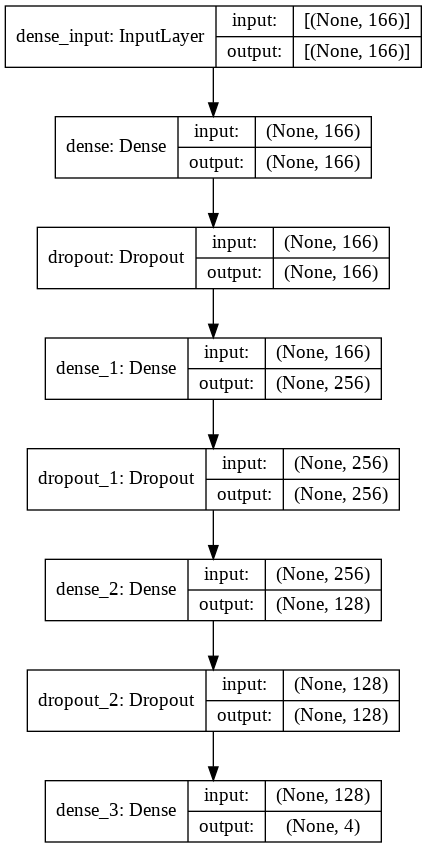

In [38]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [39]:
with tf.device('/device:GPU:0'):
  history = model.fit(X_train, y_train, 
                    batch_size=64, 
                    epochs=30,
                    verbose=2 
                    )

Epoch 1/30
1/1 - 3s - loss: 1.7586 - accuracy: 0.2500
Epoch 2/30
1/1 - 0s - loss: 2.2752 - accuracy: 0.0000e+00
Epoch 3/30
1/1 - 0s - loss: 1.2364 - accuracy: 0.2500
Epoch 4/30
1/1 - 0s - loss: 1.0787 - accuracy: 0.5000
Epoch 5/30
1/1 - 0s - loss: 0.9341 - accuracy: 0.7500
Epoch 6/30
1/1 - 0s - loss: 0.9466 - accuracy: 0.7500
Epoch 7/30
1/1 - 0s - loss: 0.6434 - accuracy: 1.0000
Epoch 8/30
1/1 - 0s - loss: 0.3829 - accuracy: 1.0000
Epoch 9/30
1/1 - 0s - loss: 0.5981 - accuracy: 1.0000
Epoch 10/30
1/1 - 0s - loss: 0.3764 - accuracy: 1.0000
Epoch 11/30
1/1 - 0s - loss: 0.1419 - accuracy: 1.0000
Epoch 12/30
1/1 - 0s - loss: 0.4028 - accuracy: 1.0000
Epoch 13/30
1/1 - 0s - loss: 0.1759 - accuracy: 1.0000
Epoch 14/30
1/1 - 0s - loss: 0.1520 - accuracy: 1.0000
Epoch 15/30
1/1 - 0s - loss: 0.0750 - accuracy: 1.0000
Epoch 16/30
1/1 - 0s - loss: 0.1328 - accuracy: 1.0000
Epoch 17/30
1/1 - 0s - loss: 0.0196 - accuracy: 1.0000
Epoch 18/30
1/1 - 0s - loss: 0.0865 - accuracy: 1.0000
Epoch 19/30
1/1

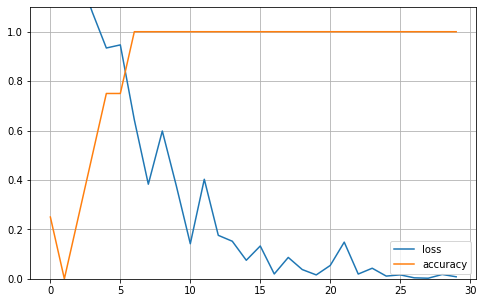

In [40]:
# Learning curve (loss and accuracy)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1.1)
plt.show()

In [41]:
y_pred = model.predict(X_train)
print(y_pred.shape)
print(y_pred)

(4, 4)
[[3.9561847e-04 7.8993116e-04 9.9816716e-01 6.4730772e-04]
 [3.0363053e-06 1.8633864e-06 1.2125547e-05 9.9998295e-01]
 [1.1368956e-03 9.9557847e-01 3.1167853e-03 1.6787549e-04]
 [9.9808925e-01 2.6402465e-04 1.4232626e-03 2.2344741e-04]]


In [42]:
prediction=[]
for i in range(len(y_pred)):
  y_pred_idx = np.argmax(y_pred[i])
  prediction.append(y_pred_idx)
print(prediction)
print(y_train)

[2, 3, 1, 0]
[[0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]]


In [44]:
f = 'drive/My Drive/My Colab/dataset/UrbanSound/sample/'+str(data[0])+'.wav'
ipd.Audio(f)